In [157]:
import seaborn as snb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [158]:
# Loading Excel Sheet

In [159]:
df = pd.read_excel("Dataset Heart Risk.xlsx")
df.head()

,P_ID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartRisk
0,1211,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1212,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1213,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1214,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1215,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [160]:
target = df.HeartRisk
df.drop(['HeartRisk','P_ID'],axis='columns',inplace=True)

In [161]:
# Creating DataFrame

In [162]:
df_num = pd.DataFrame()
df_cat = pd.DataFrame()

In [163]:
# Creating Num And Cat Dataframe Function

In [164]:
for i in df.columns:
    if df[i].dtype == object:
        df_cat[i] = df[i]
    else:
        df_num[i] = df[i]

In [165]:
df_num.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [166]:
df_cat.head()

""


In [167]:
# Creating Missing DataFrame

In [168]:
df_missing = pd.DataFrame()

In [169]:
df_missing = df.isnull().sum()
df_missing

male                 0
age                  0
education           94
currentSmoker        0
cigsPerDay          25
BPMeds              46
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             46
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            345
dtype: int64

In [170]:
# Creating Catagorical and Numerical Value Function

In [171]:
def input_class(df,flag):
    if flag==0:
        df.fillna(df.mean(),axis=0,inplace=True)
    else:
        df.fillna(df.mode(),axis=0,inplace=True)

In [172]:
input_class(df_num,0)

In [173]:
# Creating Realtion Between Numerical Value

In [174]:
corr = df_num.corr()
corr

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.032785,0.016387,0.198827,0.317426,-0.049999,-0.003783,0.008885,0.021330,-0.070436,-0.037775,0.063206,0.095366,-0.120658,0.015228
age,-0.032785,1.000000,-0.164907,-0.213234,-0.190618,0.111324,0.053681,0.296938,0.090974,0.250131,0.388454,0.199943,0.125897,-0.018917,0.116767
education,0.016387,-0.164907,1.000000,0.017395,0.003012,-0.007232,-0.042065,-0.085989,-0.026474,-0.010720,-0.134707,-0.063005,-0.125608,-0.052429,-0.030454
currentSmoker,0.198827,-0.213234,0.017395,1.000000,0.766208,-0.051305,-0.029098,-0.097329,-0.037065,-0.052833,-0.124257,-0.102923,-0.164612,0.066869,-0.049310
cigsPerDay,0.317426,-0.190618,0.003012,0.766208,1.000000,-0.042340,-0.026793,-0.058324,-0.028557,-0.027805,-0.081427,-0.048877,-0.079798,0.071238,-0.053169
BPMeds,-0.049999,0.111324,-0.007232,-0.051305,-0.042340,1.000000,0.076215,0.259289,0.049657,0.065612,0.242810,0.184810,0.086082,0.005429,0.031723
prevalentStroke,-0.003783,0.053681,-0.042065,-0.029098,-0.026793,0.076215,1.000000,0.063023,0.013293,0.001426,0.046495,0.029185,-0.015342,-0.013045,0.027299
prevalentHyp,0.008885,0.296938,-0.085989,-0.097329,-0.058324,0.259289,0.063023,1.000000,0.058654,0.154715,0.693641,0.612437,0.286529,0.147228,0.070613
diabetes,0.021330,0.090974,-0.026474,-0.037065,-0.028557,0.049657,0.013293,0.058654,1.000000,0.037410,0.098220,0.040301,0.069790,0.041416,0.568692
totChol,-0.070436,0.250131,-0.010720,-0.052833,-0.027805,0.065612,0.001426,0.154715,0.037410,1.000000,0.197706,0.155315,0.103041,0.094321,0.038114


In [175]:
## Heatmap

<AxesSubplot:>

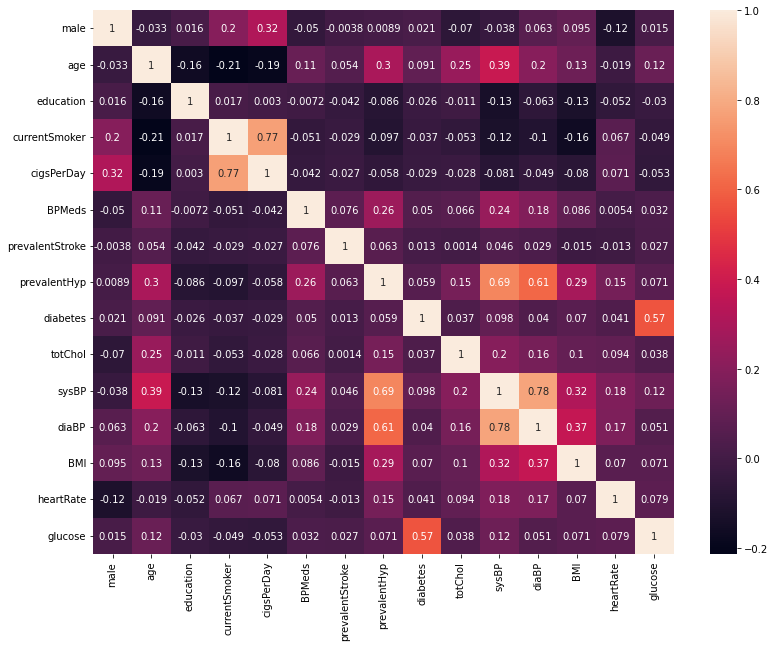

In [176]:
plt.figure(figsize=(13,10))
snb.heatmap(corr,annot=True)

In [177]:
# Outlier Function

In [204]:
def outlier(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    lst = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    mean = df[ft].mean()
    for index in lst:
        df[ft].loc[index] = mean
    
    return lst

## Storing Outlier

In [205]:
indx_lst = []
for i in df_num.columns:
    indx_lst.extend(outlier(df_num,i))

C:\Users\Lelouch\AppData\Local\Temp\ipykernel_8604\539261785.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ft].loc[index] = mean


In [180]:
indx_lst

[327,
 721,
 1054,
 1452,
 1468,
 1488,
 1849,
 2709,
 2710,
 3008,
 3673,
 13,
 42,
 44,
 49,
 77,
 154,
 158,
 161,
 193,
 245,
 255,
 299,
 314,
 333,
 346,
 374,
 395,
 421,
 458,
 471,
 541,
 590,
 660,
 665,
 699,
 723,
 738,
 750,
 765,
 769,
 786,
 795,
 797,
 864,
 890,
 976,
 998,
 1002,
 1041,
 1044,
 1078,
 1079,
 1104,
 1110,
 1122,
 1177,
 1197,
 1206,
 1262,
 1284,
 1301,
 1377,
 1389,
 1478,
 1521,
 1550,
 1557,
 1566,
 1573,
 1601,
 1616,
 1715,
 1717,
 1721,
 1762,
 1768,
 1803,
 1808,
 1854,
 1856,
 1857,
 1861,
 1902,
 1913,
 1947,
 1983,
 1985,
 1986,
 1994,
 1995,
 2002,
 2007,
 2074,
 2120,
 2173,
 2174,
 2181,
 2187,
 2263,
 2275,
 2278,
 2299,
 2367,
 2446,
 2463,
 2467,
 2473,
 2492,
 2508,
 2512,
 2560,
 2565,
 2608,
 2617,
 2645,
 2668,
 2670,
 2706,
 2733,
 2738,
 2755,
 2756,
 2779,
 2784,
 2796,
 2825,
 2835,
 2836,
 2838,
 2864,
 2882,
 2883,
 2909,
 2943,
 2969,
 2983,
 2985,
 3054,
 3088,
 3137,
 3144,
 3220,
 3226,
 3313,
 3320,
 3339,
 3340,
 3353,
 

In [207]:
df_num.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0.0,0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0.0,0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0.0,0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0.0,1,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0.0,0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


## Removing Outlier

In [181]:
# def remove(df,indx_lst):
#     indx_lst = sorted(set(indx_lst))
#     df = df.drop(indx_lst)
#     return df

## Outlier Treatment

In [182]:
# df_treatment = remove(df_num,indx_lst)

In [183]:
# df_treatment

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692,1,50,2.0,0,0.0,0.0,0,1,0,252.0,114.0,75.0,30.89,60.0,69.0
3693,1,52,3.0,0,0.0,0.0,0,0,0,225.0,119.0,65.0,26.89,62.0,74.0
3694,0,63,1.0,0,0.0,0.0,0,0,0,235.0,125.0,79.0,24.38,96.0,83.0
3696,1,41,2.0,1,40.0,0.0,0,0,0,242.0,124.5,86.5,28.80,87.0,67.0


# Creating log and exp Dataframe

In [184]:
df_log = pd.DataFrame()
df_ex = pd.DataFrame()

## Creating log function

In [185]:
for col in df_num.columns:
    df_log[col] = np.log(df_num[col])

C:\Users\Lelouch\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Lelouch\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Lelouch\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Lelouch\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Lelouch\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = ge

In [186]:
df_log

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.0,3.663562,1.386294,-inf,-inf,-inf,-inf,-inf,-inf,5.273000,4.663439,4.248495,3.294725,4.382027,4.343805
1,-inf,3.828641,0.693147,-inf,-inf,-inf,-inf,-inf,-inf,5.521461,4.795791,4.394449,3.357942,4.553877,4.330733
2,0.0,3.871201,0.000000,0.0,2.995732,-inf,-inf,-inf,-inf,5.501258,4.848116,4.382027,3.232384,4.317488,4.248495
3,-inf,4.110874,1.098612,0.0,3.401197,-inf,-inf,0.0,-inf,5.416100,5.010635,4.553877,3.352707,4.174387,4.634729
4,-inf,3.828641,1.098612,0.0,3.135494,-inf,-inf,-inf,-inf,5.652489,4.867534,4.430817,3.139833,4.442651,4.442651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,0.0,3.951244,1.098612,-inf,-inf,-inf,-inf,-inf,-inf,5.416100,4.779123,4.174387,3.291754,4.127134,4.304065
3694,-inf,4.143135,0.000000,-inf,-inf,-inf,-inf,-inf,-inf,5.459586,4.828314,4.369448,3.193763,4.564348,4.418841
3695,0.0,3.761200,1.098612,0.0,2.995732,-inf,-inf,-inf,-inf,5.480639,4.993828,4.477337,3.242592,4.174387,4.727388
3696,0.0,3.713572,0.693147,0.0,3.688879,-inf,-inf,-inf,-inf,5.488938,4.824306,4.460144,3.360375,4.465908,4.204693


## Creating exp Function

In [187]:
for col in df_num.columns:
    df_ex[col] = np.exp(df_num[col])

In [188]:
df_ex

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,2.718282,8.659340e+16,54.598150,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,4.868823e+84,1.084464e+46,2.515439e+30,5.163238e+11,5.540622e+34,2.758513e+33
1,1.000000,9.496119e+19,7.389056,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,3.746455e+108,3.545131e+52,1.506097e+35,3.001100e+12,1.811239e+41,1.014800e+33
2,2.718282,7.016736e+20,2.718282,2.718282,4.851652e+08,1.0,1.0,1.000000,1.0,2.524341e+106,2.358014e+55,5.540622e+34,1.011631e+11,3.733242e+32,2.515439e+30
3,1.000000,3.104298e+26,20.085537,2.718282,1.068647e+13,1.0,1.0,2.718282,1.0,5.203055e+97,1.393710e+65,1.811239e+41,2.583071e+12,1.694889e+28,5.399228e+44
4,1.000000,9.496119e+19,20.085537,2.718282,9.744803e+09,1.0,1.0,1.000000,1.0,5.941927e+123,2.872650e+56,3.025077e+36,1.076967e+10,8.223013e+36,8.223013e+36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,2.718282,3.831008e+22,20.085537,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,5.203055e+97,4.797813e+51,1.694889e+28,4.766270e+11,8.438357e+26,1.373383e+32
3694,1.000000,2.293783e+27,2.718282,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,1.146049e+102,1.935576e+54,2.038281e+34,3.873464e+10,4.923458e+41,1.112864e+36
3695,2.718282,4.727839e+18,20.085537,2.718282,4.851652e+08,1.0,1.0,1.000000,1.0,1.700888e+104,1.144026e+64,1.651636e+38,1.312015e+11,1.694889e+28,1.189259e+49
3696,2.718282,6.398435e+17,7.389056,2.718282,2.353853e+17,1.0,1.0,1.000000,1.0,1.256796e+105,1.173986e+54,3.685299e+37,3.218704e+12,6.076030e+37,1.252363e+29


# Converting Dataframe using Standard Scaler

In [189]:
scaler = StandardScaler()

## Removing Infinite Value

In [192]:
df_ex.replace([np.inf,-np.inf],0,inplace=True)
df_ex

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,2.718282,8.659340e+16,54.598150,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,4.868823e+84,1.084464e+46,2.515439e+30,5.163238e+11,5.540622e+34,2.758513e+33
1,1.000000,9.496119e+19,7.389056,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,3.746455e+108,3.545131e+52,1.506097e+35,3.001100e+12,1.811239e+41,1.014800e+33
2,2.718282,7.016736e+20,2.718282,2.718282,4.851652e+08,1.0,1.0,1.000000,1.0,2.524341e+106,2.358014e+55,5.540622e+34,1.011631e+11,3.733242e+32,2.515439e+30
3,1.000000,3.104298e+26,20.085537,2.718282,1.068647e+13,1.0,1.0,2.718282,1.0,5.203055e+97,1.393710e+65,1.811239e+41,2.583071e+12,1.694889e+28,5.399228e+44
4,1.000000,9.496119e+19,20.085537,2.718282,9.744803e+09,1.0,1.0,1.000000,1.0,5.941927e+123,2.872650e+56,3.025077e+36,1.076967e+10,8.223013e+36,8.223013e+36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,2.718282,3.831008e+22,20.085537,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,5.203055e+97,4.797813e+51,1.694889e+28,4.766270e+11,8.438357e+26,1.373383e+32
3694,1.000000,2.293783e+27,2.718282,1.000000,1.000000e+00,1.0,1.0,1.000000,1.0,1.146049e+102,1.935576e+54,2.038281e+34,3.873464e+10,4.923458e+41,1.112864e+36
3695,2.718282,4.727839e+18,20.085537,2.718282,4.851652e+08,1.0,1.0,1.000000,1.0,1.700888e+104,1.144026e+64,1.651636e+38,1.312015e+11,1.694889e+28,1.189259e+49
3696,2.718282,6.398435e+17,7.389056,2.718282,2.353853e+17,1.0,1.0,1.000000,1.0,1.256796e+105,1.173986e+54,3.685299e+37,3.218704e+12,6.076030e+37,1.252363e+29


In [193]:
df_transform = pd.DataFrame()
df_transform = scaler.fit_transform(df_ex)

C:\Users\Lelouch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:999: RuntimeWarning: overflow encountered in square
  temp **= 2
C:\Users\Lelouch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1005: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\Lelouch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1005: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
C:\Users\Lelouch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:84: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


In [194]:
df_transform

array([[ 1.16229162, -0.08418589,  2.63639086, ..., -0.01644753,
        -0.0172443 ,         nan],
       [-0.86036928, -0.08418588, -0.33636962, ..., -0.01644753,
        -0.0172443 ,         nan],
       [ 1.16229162, -0.08418588, -0.63048866, ..., -0.01644753,
        -0.0172443 ,         nan],
       ...,
       [ 1.16229162, -0.08418588,  0.4631288 , ..., -0.01644753,
        -0.0172443 ,         nan],
       [ 1.16229162, -0.08418589, -0.33636962, ..., -0.01644753,
        -0.0172443 ,         nan],
       [-0.86036928, -0.08418589, -0.33636962, ..., -0.01644753,
        -0.0172443 ,         nan]])

## Transforming Dataframe

In [195]:
pd.DataFrame(df_transform)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.162292,-0.084186,2.636391,-0.994606,-0.016454,-0.173089,-0.073741,-0.664194,-0.153382,NaN,-0.016447,-0.017807,-0.016448,-0.017244,NaN
1,-0.860369,-0.084186,-0.336370,-0.994606,-0.016454,-0.173089,-0.073741,-0.664194,-0.153382,NaN,-0.016447,-0.017807,-0.016448,-0.017244,NaN
2,1.162292,-0.084186,-0.630489,1.005423,-0.016454,-0.173089,-0.073741,-0.664194,-0.153382,NaN,-0.016447,-0.017807,-0.016448,-0.017244,NaN
3,-0.860369,-0.079774,0.463129,1.005423,-0.016454,-0.173089,-0.073741,1.505584,-0.153382,NaN,-0.016447,-0.017807,-0.016448,-0.017244,NaN
4,-0.860369,-0.084186,0.463129,1.005423,-0.016454,-0.173089,-0.073741,-0.664194,-0.153382,NaN,-0.016447,-0.017807,-0.016448,-0.017244,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,1.162292,-0.084185,0.463129,-0.994606,-0.016454,-0.173089,-0.073741,-0.664194,-0.153382,NaN,-0.016447,-0.017807,-0.016448,-0.017244,NaN
3694,-0.860369,-0.051587,-0.630489,-0.994606,-0.016454,-0.173089,-0.073741,-0.664194,-0.153382,NaN,-0.016447,-0.017807,-0.016448,-0.017244,NaN
3695,1.162292,-0.084186,0.463129,1.005423,-0.016454,-0.173089,-0.073741,-0.664194,-0.153382,NaN,-0.016447,-0.017807,-0.016448,-0.017244,NaN
3696,1.162292,-0.084186,-0.336370,1.005423,-0.016454,-0.173089,-0.073741,-0.664194,-0.153382,NaN,-0.016447,-0.017807,-0.016448,-0.017244,NaN


In [196]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [208]:
# df_x = SelectKBest(chi2,10).fit_transform(df_num,target)

TypeError: SelectKBest.__init__() takes from 1 to 2 positional arguments but 3 were given

In [202]:
from sklearn.model_selection import train_test_split

In [209]:
xtrain,xtest,ytrain,ytest = train_test_split(df_num,target,test_size=0.3,random_state=10)

In [210]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [213]:
df_num.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [212]:
model.fit(xtrain,ytrain)

C:\Users\Lelouch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [214]:
model.score(xtest,ytest)

0.8477477477477477

In [ ]:
from sklearn.metrics 